In [1]:
#libraries used
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cmath 

In [2]:
#-------------------------------------------------Transmitter End--------------------------------------------------------#
#Generate a signal
original_signal=[[np.random.choice([0,1]) for _ in range(2)] for _ in range(200)]
#Remove [1,1] and [0,0] components
temp=original_signal.copy()
for i in temp:
    if(i[0]==i[1]):
        original_signal.remove(i)

print(original_signal)

[[1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [1, 0]]


In [3]:
# Define additive white Gaussian noise
def channel(y, snr):
     
    np.random.seed(10)
    
       
    h_real=np.random.normal(loc=0.0, scale=1.0)  #gaussian r.v
    h_imag=np.random.normal(loc=0.0, scale=1.0)  #gaussian r.v
    h=np.array([h_real,h_imag])
    
    snr = 10 ** (snr / 10.0)    # SNR(dB) to linear scale
 
    xpower = np.sum(y ** 2) / len(y)   # signal Power 
 
    npower = xpower / snr   # Noise Power
    
    tx = (np.random.randn(len(y)) * np.sqrt(npower)).reshape(len(y),1) + np.multiply(h,y)  # Add noise to signal
        
    return tx

In [4]:
# Simulation Of Model
snr = 2 #just for checking
# transmitted signal
tx = channel(np.array(original_signal), snr)
for i in range(0,len(tx)):
    
    if ( ( (tx[i][0])**2 > (tx[i][1])**2) ) :
        print(tx[i],"so detected")
    else:
         print(tx[i],"s1 detected")    

[ 0.10403142 -1.22755509] s1 detected
[ 1.32492698 -0.00665953] so detected
[0.49354471 1.20882368] s1 detected
[ 0.75960221 -0.57198429] so detected
[1.54248985 0.21090335] so detected
[0.08622316 0.80150213] s1 detected
[1.33499531 0.0034088 ] so detected
[ 1.19289663 -0.13868988] so detected
[1.67555143 0.34396493] so detected
[2.28719306 0.95560655] so detected
[-0.76657891 -0.05129994] so detected
[0.81678713 1.53206611] s1 detected
[0.18160737 0.89688634] s1 detected
[1.68517188 0.35358537] so detected
[-0.90283523 -0.18755625] so detected
[0.10734304 0.82262201] s1 detected
[1.17920966 1.89448863] s1 detected
[-0.85771951 -0.14244053] so detected
[-1.57096541 -0.85568644] so detected
[-0.05322333 -1.38480984] s1 detected
[1.54293355 0.21134704] so detected
[1.89444689 2.60972586] s1 detected
[2.22416619 0.89257969] so detected
[2.66019755 1.32861105] so detected
[1.41034353 0.07875702] so detected
[2.4420545  1.11046799] so detected
[-0.21545994  0.49981904] s1 detected
[0.48708

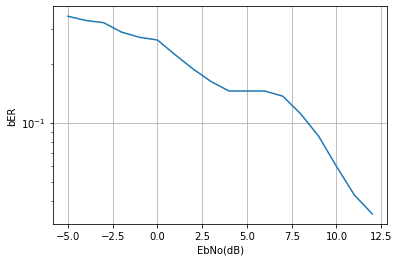

In [5]:
#Plot BER vs SNR
EbNodB_range = range(-5,13)   # SNR Varying Range
itr = len(EbNodB_range)
ber = [None]*itr            # letters error rate
for n in range(0,itr):
    
    #----------------------Transmission: AWGN Channel----------------------#
    snr = EbNodB_range[n]  
    tx = channel(np.array(original_signal), snr)   # transmitted signal
    err=0
      
    for i in range(0,len(tx)):
        if ( ( (tx[i][0])**2 > (tx[i][1])**2) and (np.array(original_signal)[i][1]==1) ) or ( ( (tx[i][0])**2 < (tx[i][1])**2) and (np.array(original_signal)[i][0]==1) ):
            err=err+1
    ber[n]=err/len(tx)
    
plt.plot(EbNodB_range, ber)
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('bER')
plt.grid(True)
plt.show()   
    